In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import qmc
# from sklearn.preprocessing import MinMaxScaler
import os
from scipy import interpolate
from scipy.interpolate import CubicSpline

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
np.set_printoptions(threshold=1000000)
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Activation, BatchNormalization, LeakyReLU
from keras.layers import Dropout, UpSampling2D, ZeroPadding2D, AveragePooling2D, Conv2DTranspose, Add
from keras.layers import Flatten, Cropping1D, Reshape
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D,MaxPooling1D 
from keras.engine.topology import Layer
from keras.layers import Lambda, Input, GRU, LSTM
import tensorflow as tf
from itertools import product
from keras.layers import Conv1DTranspose
from keras.layers import Conv3DTranspose
import seaborn as sns
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

2023-07-25 16:19:42.646040: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
y1=np.loadtxt('S11_batch4K.txt')
np.shape(y1)
y2=np.loadtxt('S11_batch8K.txt')
np.shape(y2)

(4096, 128)

In [4]:
YY3=np.concatenate((y1,y2),axis=0)
np.shape(YY3)

(8192, 128)

In [5]:
 print(np.where(YY3>0))
YY= np.delete(YY3,[1379,1957,2468,2689,5090,7361],axis=0)
np.shape(YY)


(array([1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1957, 1957,
       1957, 1957, 1957, 1957, 1957, 1957, 1957, 2468, 2468, 2468, 2468,
       2468, 2468, 2468, 2468, 2468, 2689, 2689, 2689, 2689, 2689, 2689,
       2689, 2689, 2689, 5090, 5090, 5090, 7361]), array([57, 61, 63, 65, 66, 67, 68, 69, 70, 57, 61, 63, 65, 66, 67, 68, 69,
       70, 57, 61, 63, 65, 66, 67, 68, 69, 70, 57, 61, 63, 65, 66, 67, 68,
       69, 70,  3,  4,  6,  6]))


(8186, 128)

In [1687]:
#  print(np.where(y2>0))
# y2= np.delete(y2,[994,3265],axis=0)
# np.shape(y2)


(array([ 994,  994,  994, 3265]), array([3, 4, 6, 6]))


(4094, 128)

In [891]:
# yy=np.concatenate((yy2,yy3),axis=0)
# np.shape(yy2)

(2047, 128)

In [6]:
yy2= YY/10
yy2=10**yy2
np.min(yy2)

2.920868465670405e-06

In [10]:
# xx1=np.loadtxt("str128_4K.txt")
# np.shape(xx1)

In [11]:
# xx2=np.loadtxt("str128_8K.txt")
# np.shape(xx2)

In [16]:
x1=np.loadtxt("X_batch4K.txt")
x1=x1[:,0:8]
np.shape(x1)
x2=np.loadtxt("X_batch8K.txt")
x2=x2[:,0:8]
np.shape(x1)
XX=np.concatenate((x1,x2),axis=0)
np.shape(XX)

(8192, 8)

In [17]:
y1=np.loadtxt("Y_batch4K.txt")
y1=y1[:,0:8]
y2=np.loadtxt("Y_batch8K.txt")
y2=y2[:,0:8]
np.shape(y1)
YY=np.concatenate((y1,y2),axis=0)
np.shape(YY)

(8192, 8)

In [18]:
xy=np.concatenate((XX,YY),axis=1)
np.shape(xy)

(8192, 16)

In [19]:
xx2=np.delete(xy,[1379,1957,2468,2689,5090,7361],axis=0)
np.shape(xx2)

(8186, 16)

In [21]:
np.min(xx2)

-0.03

In [550]:
# xx1=np.delete(xx1,[1379,1957,2468,2689],axis=0)
# np.shape(xx1)

(4092, 17)

In [1690]:
# xx2=np.delete(xy,[994,3265],axis=0)
# np.shape(xx2)

(4094, 16)

In [17]:
# xx=np.concatenate((xx1,xx2),axis=0)
# np.shape(xx)

(8186, 17)

In [19]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]


# Data Preprocessing and normalization

In [551]:
# pi = math.pi
# # xx=np.loadtxt("str_32K.txt")
# lower = np.array([10,10,10,10,10,10,10,10,
#                   10,10,10,10,10,10,10,10,
#                   2*pi-5*pi/12]) #R1,R2,Phi1,Phi2,Alpha

# upper = np.array([30,30,30,30,30,30,30,30,
#                   100,100,100,100,100,100,100,100,
#                   2*pi-pi/12])
# for i in range (np.shape(xx1)[0]):
#     xx1[i] = (xx1[i]-lower)/(upper-lower)
# # print(xx)
# np.shape(xx1)

(4092, 17)

In [22]:
lower = np.array([-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,
                  -0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03])
                  

upper = np.array([0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,
                  0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03])
                  
for i in range (np.shape(xx2)[0]):
    xx2[i] = (xx2[i]-lower)/(upper-lower)
np.min(xx2)

0.0

In [16]:
xx= np.zeros(np.shape(xx2))
xx = (xx2-np.min(xx2))/(np.max(xx2)-np.min(xx2))
np.min(xx)

0.0

In [23]:
print(np.max(xx2),np.min(xx2),np.shape(xx2))

0.999 0.0 (8186, 16)


In [24]:
print(np.max(yy2),np.min(yy2),np.shape(yy2))

0.9984883452966085 2.920868465670405e-06 (8186, 128)


In [912]:
yy=np.concatenate((yy2,yy3),axis=0)
np.shape(yy)

(10233, 128)

In [922]:
x = np.concatenate((xx,xx1),axis=0)
np.shape(x)

(10233, 16)

In [970]:
np.shape(xx)

(8186, 16)

# S11 Training

# Custom loss function

In [29]:
# Custom relative error
def rel_loss(y_true, y_pred):
#     error = tf.square((y_true - y_pred)/(y_pred))
    loss = tf.reduce_mean(tf.abs((y_true - y_pred)) / ((y_true)))
    return loss
   

In [594]:

mask = np.where(yy2 < 0.316, 1, 0)

mask = np.expand_dims(mask, axis=-1)

yy2_pad = np.concatenate((yy2[:, :, np.newaxis], mask), axis=-1)

print("Original shape:", yy2.shape)
print("Padded shape:", yy2_pad.shape)


Original shape: (1024, 128)
Padded shape: (1024, 128, 2)


In [28]:
    def S11_loss_pad(y_true, y_pred,mask):
        y_pred_masked = tf.math.multiply(y_pred, mask)
        y_pred=y_pred_masked
        print('y_pred_mask',y_pred_masked.shape)
#         print(type(y_true))
#         print('y_tr',y_true[:,0,0].eval(session = tf.compat.v1.Session()))
        alpha = 0.1
        error=[]
        for i in range(y_true.shape[1]):
            if y_true[:,i,1]==1:
                error.append(tf.abs((y_true[:,i,0] - y_pred[:,i])) / ((y_true[:,i,0])))
            else:
                error.append(alpha*tf.abs((y_true[:,i,0] - y_pred[:,i])) / ((y_true[:,i,0])))
        loss = tf.reduce_mean(tf.Tensor(error))
        return loss

In [23]:
def S11_loss(y_true, y_pred):
    print('y_tr',y_true.shape,'y_pr', y_pred.shape)
    loss = tf.reduce_mean(tf.abs((y_true - y_pred)) / ((y_true)))
    return loss
  

In [1978]:
def S11_new(alpha):
    def custom_loss(y_true, y_pred):
        error1 = tf.reduce_mean(tf.abs(y_true - y_pred))
        error2 = tf.reduce_mean(tf.square(y_true - y_pred))
        loss = alpha*error1 + (1-alpha)*error2
        return loss
    return custom_loss

# Simple Dense Network

In [25]:
x1_tr,x1_te,y1_tr,y1_te= train_test_split(xx2, yy2, test_size= 0.2, shuffle=True)
print(np.shape(x1_tr), np.shape(x1_te), np.shape(y1_tr), np.shape(y1_te))

(6548, 16) (1638, 16) (6548, 128) (1638, 128)


In [28]:
def std_dev(actu, pred):
    return keras.backend.std(keras.backend.abs(actu - pred))

def mmae(actu, pred):
    return keras.backend.max(keras.backend.abs(actu - pred))


In [ ]:
# initializer = tf.keras.initializers.GlorotNormal()
from tensorflow.keras.regularizers import l1, l2, L1L2
# l1_regularization = 0.1
lamda =5e-7
# l2_regularization = 0.01 
from tensorflow.keras.layers import Input, Dense, concatenate

with tf.device('/device:GPU:2'):
#     input_shape = (16,)
    iput = Input(shape=(16,))
#     input_radius = Input(shape=input_shape)
#     input_theta = Input(shape=input_shape)
#     concatenated = concatenate([input_radius, input_theta])
    
    dens1 = Dense(64, activation="relu",kernel_regularizer=L1L2(lamda))(iput)
#     dens2 = Dense(64, activation="relu")(dens1)
#     dens2 = Dropout(0.5)(dens2)
    dens3 = Dense(128, activation="relu",kernel_regularizer=L1L2(lamda))(dens1)
#     dens3 = Dropout(0.5)(dens3)
    dens4 = Dense(256, activation="relu",kernel_regularizer=L1L2(lamda))(dens3)
#     dens4 = Dropout(0.3)(dens4)
    dens5 = Dense(512, activation="relu",kernel_regularizer=L1L2(lamda))(dens4)
#     dens5 = Dropout(0.3)(dens5)
#     dens5 = Dense(256, activation="relu")(dens4)
#     dens5 = Dropout(0.5)(dens5)
#     dens30 = Dense(256, activation="relu",kernel_initializer=initializer)(dens29)
#     dens30 = Dropout(0.5)(dens30) 
#     dens31 = Dense(128, activation="relu",kernel_initializer=initializer)(dens3)
    dens32 = Dense(256, activation="relu")(dens5)
#     dens32 = Dropout(0.3)(dens32)
    dens33 = Dense(128, activation="relu")(dens32)

    densf = Dense(128, activation='linear',kernel_regularizer=L1L2(lamda))(dens33)
    oput=densf
    

    model1 = Model(inputs=iput, outputs = oput)

#     model1 = Model(inputs = iput, outputs = oput)
    model1.summary()
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    model1.compile(optimizer = 'adam',
                   loss=['mae','mse'],
                    metrics=['mse'])

# Large Dense N/W

In [1505]:
# initializer = tf.keras.initializers.GlorotNormal()
# ,kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.0001)
with tf.device('/device:GPU:2'):
    iput = Input(shape=(16,))
    dens1 = Dense(32)(iput)
    dens1 = LeakyReLU()(dens1)
    dens1 = BatchNormalization()(dens1)
#     dens1 = Dropout(0.5)(dens1)
    dens2 = Dense(64)(dens1)
    dens2 = LeakyReLU()(dens2)
    dens2 = BatchNormalization()(dens2)
#     dens2 = Dropout(0.5)(dens2)
    dens3 = Dense(128)(dens2)
    dens3 = LeakyReLU()(dens3)
    dens3 = BatchNormalization()(dens3)
#     dens3 = Dropout(0.5)(dens3)
    dens4 = Dense(256)(dens3)
    dens4 = LeakyReLU()(dens4)
    dens4 = BatchNormalization()(dens4)
    dens4 = Dropout(0.5)(dens4)
    
    dens31 = Dense(128)(dens4)
    dens31 = LeakyReLU()(dens31)
    dens31 = BatchNormalization()(dens31)
    dens31 = Dropout(0.5)(dens31)
    dens32 = Dense(128)(dens31)
    dens32 = LeakyReLU()(dens32)
    dens32 = BatchNormalization()(dens32)
    dens32 = Dropout(0.5)(dens32)
    

    densf = Dense(128, activation='linear')(dens32)
    oput=densf


    model2 = Model(inputs=iput, outputs = oput)

#     model1 = Model(inputs = iput, outputs = oput)
    model2.summary()

    model2.compile(optimizer = 'adam',
                   loss = ['mse'],
                        metrics=['mse'])


Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 16)]              0         
_________________________________________________________________
dense_144 (Dense)            (None, 32)                544       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
batch_normalization_281 (Bat (None, 32)                128       
_________________________________________________________________
dense_145 (Dense)            (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
batch_normalization_282 (Bat (None, 64)                256

# Conv1D model

In [26]:
from tensorflow.keras.regularizers import l1, l2,L1L2
from keras.optimizers import SGD
initializer = tf.keras.initializers.GlorotNormal()
# l1_regularization = 0.3
# l2_regularization = 0.1 ,,kernel_regularizer=l1_l2(lamda)
lamda =1e-7
# activity_regularizer=l2(l2_regularization)
with tf.device('/device:GPU:2'):
    
         
    iput = Input(shape=(16,1))

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(iput)
    #    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv1)
    conv2 = BatchNormalization()(conv2)
    #     conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv3 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv2)
    conv3 = BatchNormalization()(conv3)
    #     conv3 = MaxPooling1D(pool_size=2)(conv3)
    conv4 = Conv1D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv3)
    conv4 = BatchNormalization()(conv4)
    #     conv4 = Dropout(0.3)(conv4)
    #     conv4 = MaxPooling1D(pool_size=2)(conv4)
    conv5 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv4)
    conv5 = BatchNormalization()(conv5)
    #     conv5 = Dropout(0.3)(conv5)
    #     conv5 = MaxPooling1D(pool_size=2)(conv5)
    conv6 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv5)
    conv6 = BatchNormalization()(conv6)
    #     conv6 = MaxPooling1D(pool_size=2)(conv6)
    conv7 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv6)
    conv7 = BatchNormalization()(conv7)
    #     conv7= MaxPooling1D(pool_size=2)(conv7)
    F = Flatten()(conv7)

    dens1 = Dense(128, activation='relu',kernel_initializer=initializer,kernel_regularizer=L1L2(lamda))(F)
    #     dens1= BatchNormalization()(dens1)
    densf = Dense(128, activation='linear')(dens1)
    oput=densf


    model3 = Model(inputs=iput, outputs = oput)


    model3.summary()
    #     opt = SGD(learning_rate=0.001, momentum=0.99)
    model3.compile(optimizer = 'adam',
                    loss=['mse'],
                    metrics=['mse'])
        

2023-07-25 16:23:42.403536: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-25 16:23:42.404970: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-25 16:23:42.448744: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.683GHz coreCount: 15 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 238.66GiB/s
2023-07-25 16:23:42.449126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.683GHz coreCount: 15 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 238.66GiB/s
2023-07-25 16:23:42.449491: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:0b:00.0 name

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 14, 64)            256       
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 128)           24704     
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 128)           512       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 256)           98560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 256)           1024  

In [27]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50)
               
with tf.device('/device:GPU:2'):
    hstry3 = model3.fit(x1_tr,y1_tr, epochs =5000,
                        batch_size=128, shuffle=True,
                validation_data=(x1_te,y1_te),callbacks=[es])


2023-07-25 16:23:52.375161: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-25 16:23:52.375598: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2998255000 Hz


Epoch 1/5000


2023-07-25 16:23:54.063507: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-25 16:23:54.205843: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


52/52 [==============================] - 4s 23ms/step - loss: 0.4607 - mse: 0.4576 - val_loss: 0.2749 - val_mse: 0.2718
Epoch 2/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0447 - mse: 0.0416 - val_loss: 0.1605 - val_mse: 0.1573
Epoch 3/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0402 - mse: 0.0371 - val_loss: 0.1144 - val_mse: 0.1113
Epoch 4/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0387 - mse: 0.0356 - val_loss: 0.1023 - val_mse: 0.0992
Epoch 5/5000
52/52 [==============================] - 1s 13ms/step - loss: 0.0373 - mse: 0.0342 - val_loss: 0.0709 - val_mse: 0.0678
Epoch 6/5000
52/52 [==============================] - 1s 13ms/step - loss: 0.0374 - mse: 0.0343 - val_loss: 0.0599 - val_mse: 0.0568
Epoch 7/5000
52/52 [==============================] - 1s 12ms/step - loss: 0.0364 - mse: 0.0333 - val_loss: 0.0504 - val_mse: 0.0473
Epoch 8/5000
52/52 [==============================] - 1s 13ms/step - loss: 0.0355 

52/52 [==============================] - 1s 13ms/step - loss: 0.0085 - mse: 0.0052 - val_loss: 0.0208 - val_mse: 0.0176
Epoch 63/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0082 - mse: 0.0049 - val_loss: 0.0208 - val_mse: 0.0176
Epoch 64/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0082 - mse: 0.0050 - val_loss: 0.0205 - val_mse: 0.0173
Epoch 65/5000
52/52 [==============================] - 1s 13ms/step - loss: 0.0082 - mse: 0.0050 - val_loss: 0.0204 - val_mse: 0.0172
Epoch 66/5000
52/52 [==============================] - 1s 13ms/step - loss: 0.0080 - mse: 0.0048 - val_loss: 0.0207 - val_mse: 0.0175
Epoch 67/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0081 - mse: 0.0049 - val_loss: 0.0206 - val_mse: 0.0174
Epoch 68/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0086 - mse: 0.0054 - val_loss: 0.0210 - val_mse: 0.0178
Epoch 69/5000
52/52 [==============================] - 1s 14ms/step - loss: 

52/52 [==============================] - 1s 15ms/step - loss: 0.0060 - mse: 0.0027 - val_loss: 0.0191 - val_mse: 0.0158
Epoch 124/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0060 - mse: 0.0027 - val_loss: 0.0185 - val_mse: 0.0153
Epoch 125/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0058 - mse: 0.0025 - val_loss: 0.0187 - val_mse: 0.0155
Epoch 126/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0057 - mse: 0.0025 - val_loss: 0.0193 - val_mse: 0.0161
Epoch 127/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0058 - mse: 0.0026 - val_loss: 0.0199 - val_mse: 0.0167
Epoch 128/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0067 - mse: 0.0035 - val_loss: 0.0191 - val_mse: 0.0159
Epoch 129/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0060 - mse: 0.0028 - val_loss: 0.0204 - val_mse: 0.0172
Epoch 130/5000
52/52 [==============================] - 1s 15ms/step -

Epoch 184/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0052 - mse: 0.0021 - val_loss: 0.0185 - val_mse: 0.0154
Epoch 185/5000
52/52 [==============================] - 1s 16ms/step - loss: 0.0054 - mse: 0.0024 - val_loss: 0.0185 - val_mse: 0.0155
Epoch 186/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0051 - mse: 0.0020 - val_loss: 0.0184 - val_mse: 0.0154
Epoch 187/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0049 - mse: 0.0018 - val_loss: 0.0188 - val_mse: 0.0158
Epoch 188/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0050 - mse: 0.0020 - val_loss: 0.0192 - val_mse: 0.0162
Epoch 189/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0079 - mse: 0.0048 - val_loss: 0.0243 - val_mse: 0.0211
Epoch 190/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0088 - mse: 0.0055 - val_loss: 0.0205 - val_mse: 0.0172
Epoch 191/5000
52/52 [==============================] -

Epoch 245/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0043 - mse: 0.0016 - val_loss: 0.0178 - val_mse: 0.0151
Epoch 246/5000
52/52 [==============================] - 1s 16ms/step - loss: 0.0043 - mse: 0.0016 - val_loss: 0.0176 - val_mse: 0.0149
Epoch 247/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0044 - mse: 0.0017 - val_loss: 0.0177 - val_mse: 0.0149
Epoch 248/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0048 - mse: 0.0021 - val_loss: 0.0180 - val_mse: 0.0153
Epoch 249/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0045 - mse: 0.0017 - val_loss: 0.0177 - val_mse: 0.0149
Epoch 250/5000
52/52 [==============================] - 1s 14ms/step - loss: 0.0044 - mse: 0.0016 - val_loss: 0.0181 - val_mse: 0.0153
Epoch 251/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0044 - mse: 0.0017 - val_loss: 0.0184 - val_mse: 0.0157
Epoch 252/5000
52/52 [==============================] -

Epoch 306/5000
52/52 [==============================] - 1s 16ms/step - loss: 0.0039 - mse: 0.0014 - val_loss: 0.0174 - val_mse: 0.0148
Epoch 307/5000
52/52 [==============================] - 1s 16ms/step - loss: 0.0040 - mse: 0.0015 - val_loss: 0.0177 - val_mse: 0.0151
Epoch 308/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0040 - mse: 0.0014 - val_loss: 0.0175 - val_mse: 0.0149
Epoch 309/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0043 - mse: 0.0017 - val_loss: 0.0179 - val_mse: 0.0153
Epoch 310/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0042 - mse: 0.0016 - val_loss: 0.0181 - val_mse: 0.0155
Epoch 311/5000
52/52 [==============================] - 1s 16ms/step - loss: 0.0052 - mse: 0.0026 - val_loss: 0.0186 - val_mse: 0.0159
Epoch 312/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0050 - mse: 0.0023 - val_loss: 0.0185 - val_mse: 0.0158
Epoch 313/5000
52/52 [==============================] -

52/52 [==============================] - 1s 15ms/step - loss: 0.0036 - mse: 0.0011 - val_loss: 0.0172 - val_mse: 0.0148
Epoch 367/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0035 - mse: 0.0011 - val_loss: 0.0172 - val_mse: 0.0148
Epoch 368/5000
52/52 [==============================] - 1s 15ms/step - loss: 0.0034 - mse: 9.6712e-04 - val_loss: 0.0175 - val_mse: 0.0151


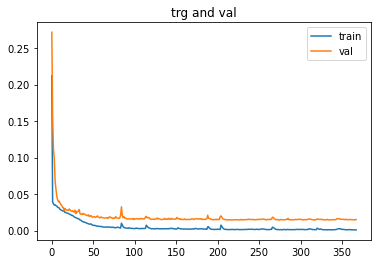

In [28]:
plt.plot(hstry3.history['mse'],label='train')
plt.plot(hstry3.history['val_mse'],label='val')
plt.title('trg and val')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

with tf.device('/device:GPU:2'):
    y1_pre = model3.predict(x1_te)
    err = np.mean((y1_te - y1_pre)**2)
    print('error=',err)
    
mse = mean_squared_error(y1_te, y1_pre)
mae = mean_absolute_error(y1_te, y1_pre)
r2 = r2_score(y1_te, y1_pre)
adj_r2 = (1 - (1 - r2) * ((y1_te.shape[0] - 1) / 
          (y1_te.shape[0] - y1_te.shape[1] - 1)))
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2_score:", r2)
print("Adjusted_R2_score:", adj_r2)

error= 0.015133031896118235
Mean Squared Error (MSE): 0.015133031896118237
Mean Absolute Error (MAE): 0.05824766703101941
R2_score: 0.5618889544664233
Adjusted_R2_score: 0.5247264535861729


In [34]:
model3.save("model2.h5")
print("Saved model to disk")

Saved model to disk


In [782]:
# y3=np.loadtxt('ant128_S11_batch12K_1.txt',delimiter=',')
# np.shape(y3)
# print(np.where(y3>0))
# y3 = np.delete(y3,[1607],axis=0)
# np.shape(y3)

(array([1607, 1607, 1607, 1607, 1607, 1607, 1607]), array([ 86, 102, 103, 112, 115, 123, 124]))


(2047, 128)

In [878]:
# yy3= y3/10
# yy3=10**yy3
# np.min(yy3)

8.740763733681285e-06

In [918]:
# X3=np.loadtxt('X_128f_batch12K_1.txt')
# X3 = X3[:,0:8]
# Y3=np.loadtxt('Y_128f_batch12K_1.txt')
# Y3 = Y3[:,0:8]
# XX=np.concatenate((X3,Y3),axis=1)
# np.shape(XX)

(2048, 16)

In [919]:
# XX= np.delete(XX,[1607],axis=0)
# np.shape(XX)

(2047, 16)

In [920]:
# xx1= np.zeros(np.shape(XX))
# xx1 = (XX-np.min(XX))/(np.max(XX)-np.min(XX))
# np.max(xx1)

1.0

In [6]:
# model3.load_weights("model.h5")
# y2_pre = model3.predict(xx1)
# err = np.mean((yy3 - y2_pre)**2)
# print('error=',err)

NameError: name 'model3' is not defined

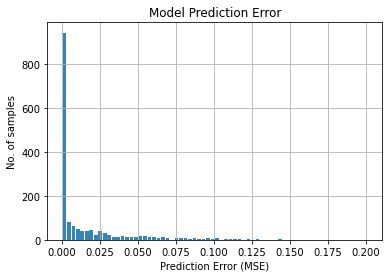

1360 out of 1638
MSE_error< 0.03 = 83.02808302808303 %


In [30]:
prediction_error = np.mean(np.square(y1_te - y1_pre), axis=1)
# prediction_error = np.mean(np.square(yy3 - y2_pre), axis=1)
# Plot histogram of prediction error
plt.hist(prediction_error, bins='auto', alpha=0.9, rwidth=0.8)
plt.xlabel('Prediction Error (MSE)')
plt.ylabel('No. of samples')
plt.title('Model Prediction Error')
plt.grid(True)
plt.show()
pred=np.size(np.where(prediction_error<0.03))
sample=y1_te.shape[0]                     
print(pred, 'out of',y1_te.shape[0])
print('MSE_error< 0.03 =',pred*100/sample,'%')

In [28]:
predy=np.argmax(y1_pre)
print(predy)

41388


666
MSE_error= 0.0005419345816118407
MAE_error= 0.017967866539256225
true_max= 0.9761127824302128 true_min= 0.014440492323435524
pred_max= 0.98546135 pred_min= 0.05079873


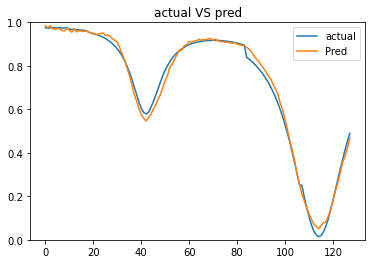

In [33]:
rr = np.random.randint(0,1638)
# rr=1261
print(rr)
err1 = np.mean((y1_te[rr] - y1_pre[rr])**2)
print('MSE_error=',err1)
err2 = np.mean(np.absolute(y1_te[rr] - y1_pre[rr]))
print('MAE_error=',err2)
print('true_max=',np.max(y1_te[rr]),'true_min=',np.min(y1_te[rr]))
print('pred_max=',np.max(y1_pre[rr]),'pred_min=',np.min(y1_pre[rr]))
plt.plot(y1_te[rr],label='actual')
plt.plot(y1_pre[rr],label='Pred')
plt.title('actual VS pred')
plt.legend()
plt.ylim(0,1)
plt.show()

<AxesSubplot:>

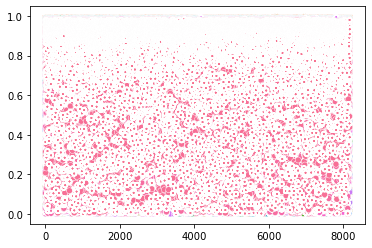

In [2923]:
sns.scatterplot(data=yy2,legend=False)

# Custom loss functions

In [82]:
def S11_reg(reg_fac):
    # function that accepts the ground truth and predictions
    def S11_Reg(y_true, y_pred):
        error = y_true - y_pred
        return tf.square(error) + reg_fac*tf.abs(error)
    # return the inner function tuned by the hyperparameter
    return S11_Reg

In [83]:
def S11_huber(threshold):
    # function that accepts the ground truth and predictions
    def my_huber_loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = threshold * (tf.abs(error) - (threshold / 2))
        return tf.where(is_small_error, small_error_loss, big_error_loss)
    # return the inner function tuned by the hyperparameter
    return my_huber_loss

In [70]:
def S11_exp(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

# LSTM model

In [1240]:

with tf.device('/device:GPU:2'):
   

    input_shape = (17,1)
    iput = Input(shape=input_shape)
    dens1 = Dense(32, activation="relu")(iput)
    dens2 = Dense(64, activation="relu")(dens1)
    dens3 = Dense(128, activation="relu")(dens2)
    dens4 = Dense(256, activation="relu")(dens3)
#     dens5 = GRU(256,input_shape = (17,1))(dens4)
#     d1 = Dropout(0.5)(dens5)
    L1 = LSTM(512,input_shape = (17,1))(dens4)
    d1 = Dropout(0.5)(L1)
    
    densf = Dense(16, activation='tanh')(d1)
    oput = densf

    model5 = Model(inputs=iput, outputs=oput)
    model5.summary()

    model5.compile(optimizer='adam', loss='mse', metrics=['mse'])
   

Model: "model_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        [(None, 17, 1)]           0         
_________________________________________________________________
dense_369 (Dense)            (None, 17, 32)            64        
_________________________________________________________________
dense_370 (Dense)            (None, 17, 64)            2112      
_________________________________________________________________
dense_371 (Dense)            (None, 17, 128)           8320      
_________________________________________________________________
dense_372 (Dense)            (None, 17, 256)           33024     
_________________________________________________________________
lstm (LSTM)                  (None, 512)               1574912   
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0  

In [4]:
np.__version__

'1.19.5'

# Decision tree model

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xx2,yy2, test_size=0.2 ,random_state=42)
# scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(x_train, y_train)

# Predicting a new result
y_pred=regressor.predict(x_test)
# y_pred

In [114]:
pred_len = range(1, len(y_test)+1)
pred_len

range(1, 820)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


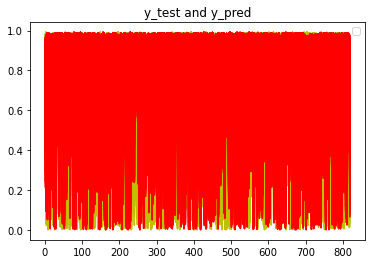

In [115]:
plt.plot(pred_len, y_pred, 'y')
plt.plot(pred_len, y_test, 'r')
plt.title('y_test and y_pred')
plt.legend()

309


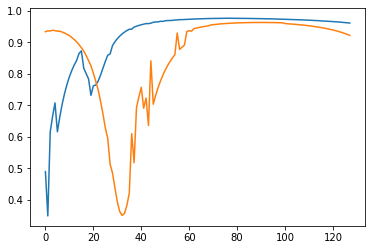

In [137]:
rr = np.random.randint(0,820)
print(rr)
plt.plot(y_pred[rr])
plt.plot(y_test[rr])

# Cubic spline interpolation

28640


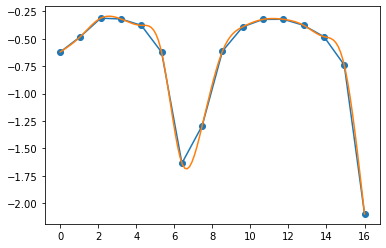

In [1686]:
rr = np.random.randint(0,32768)
print(rr)
x= np.linspace(0,16,16)
y=YY1[rr,:]
x_vals=np.linspace(0,16,128) 
# f= interpolate.interp1d(x,y,'cubic')

f = CubicSpline(x, y, bc_type='natural')
y_vals=f(x_vals)
plt.plot(x,y,'-o')
plt.plot(x_vals,y_vals)
plt.show()

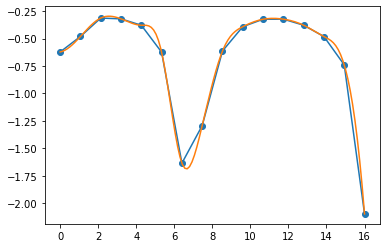

In [1687]:
f= interpolate.interp1d(x,y,'cubic')
y_vals=f(x_vals)
plt.plot(x,y,'-o')
plt.plot(x_vals,y_vals)
plt.show()

In [1688]:
# err = np.mean((y_orig - y_vals)**2)
# print(err)

In [40]:
type(product)

tensorflow.python.framework.ops.Tensor

In [46]:
print(product.eval(session = tf.compat.v1.Session())[0][0]==12)

True


2023-07-08 12:58:24.059867: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
